In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [287]:
dataset=pd.read_csv(r"data_hotel.csv")

In [288]:
dataset.head(5)

,Unnamed: 0,name,city,Check_in_date,Check_out_date,Rating,Review,Distance_to_city_center(km),Distance_to_Airpot(km),pool,...,free_parking,bathtub,restuarant,Airport_transfer,Bar,Kitchen,Connecting_rooms_available,Internet_access,Pet_friendly,PRICE
0,0,The Park Hyderabad,Hyderabad,12-02-2021,14-02-2021,NaN,NaN,4.0,20.0,yes,...,yes,no,yes,yes,no,no,no,no,no,5040
1,1,The Westin Hyderabad Mindspace,Hyderabad,12-02-2021,14-02-2021,NaN,NaN,9.9,22.0,yes,...,yes,no,yes,yes,no,no,no,no,no,7800
2,2,Courtyard by Marriott Hyderabad,Hyderabad,12-02-2021,14-02-2021,NaN,NaN,4.7,21.0,yes,...,yes,no,yes,yes,no,no,no,no,no,6700
3,3,Courtyard by Marriott Hyderabad,Hyderabad,12-02-2021,14-02-2021,NaN,NaN,4.7,21.0,yes,...,yes,no,yes,yes,no,no,no,no,no,6700
4,4,Radisson Blu Plaza Hotel Hyderabad Banjara Hills,Hyderabad,12-02-2021,14-02-2021,7.6,Good,4.5,20.0,yes,...,yes,no,yes,yes,no,no,no,no,no,6375


In [289]:
dataset.drop(["Unnamed: 0","Rating","Review"],axis=1,inplace=True)

In [290]:
dataset.isnull().any()

name                           False
city                           False
Check_in_date                  False
Check_out_date                 False
Distance_to_city_center(km)     True
Distance_to_Airpot(km)          True
pool                           False
gym                            False
spa                            False
free_parking                   False
bathtub                        False
restuarant                     False
Airport_transfer               False
Bar                            False
Kitchen                        False
Connecting_rooms_available     False
Internet_access                False
Pet_friendly                   False
PRICE                          False
dtype: bool

In [291]:
dataset.dtypes

name                            object
city                            object
Check_in_date                   object
Check_out_date                  object
Distance_to_city_center(km)    float64
Distance_to_Airpot(km)         float64
pool                            object
gym                             object
spa                             object
free_parking                    object
bathtub                         object
restuarant                      object
Airport_transfer                object
Bar                             object
Kitchen                         object
Connecting_rooms_available      object
Internet_access                 object
Pet_friendly                    object
PRICE                            int64
dtype: object

In [292]:


dataset["Check_in_date"]=pd.to_datetime(dataset["Check_in_date"])

dataset["check_in_month"]=dataset["Check_in_date"].dt.month

dataset["check_in_year"]=dataset["Check_in_date"].dt.year

dataset["check_in_day"]=dataset["Check_in_date"].dt.day

dataset["Check_out_date"]=pd.to_datetime(dataset["Check_out_date"])

dataset["check_out_year"]=dataset["Check_out_date"].dt.year

dataset["check_out_month"]=dataset["Check_out_date"].dt.month

dataset["check_out_day"]=dataset["Check_out_date"].dt.day



In [293]:
dataset.drop(["Check_in_date","Check_out_date"],axis=1,inplace=True)

In [294]:
dataset["name"].value_counts()

Courtyard by Marriott Mumbai International Airport    9
Best Western Ashoka                                   8
ITC Sonar, a Luxury Collection Hotel, Kolkata         7
Fairfield by Marriott Kolkata                         7
Elita Rooms                                           7
                                                     ..
OYO 6340 Glorify Stay 3                               1
Ondas Do Mar Beach Resort Phase 1                     1
Sayaji Pune                                           1
Hotel Leafio Mumbai                                   1
Beith Annexe                                          1
Name: name, Length: 1983, dtype: int64

# 1. Handle Missing values

In [295]:
dataset.isnull().sum()

name                            0
city                            0
Distance_to_city_center(km)    23
Distance_to_Airpot(km)         23
pool                            0
gym                             0
spa                             0
free_parking                    0
bathtub                         0
restuarant                      0
Airport_transfer                0
Bar                             0
Kitchen                         0
Connecting_rooms_available      0
Internet_access                 0
Pet_friendly                    0
PRICE                           0
check_in_month                  0
check_in_year                   0
check_in_day                    0
check_out_year                  0
check_out_month                 0
check_out_day                   0
dtype: int64

In [296]:
dataset.median()

Distance_to_city_center(km)       8.2
Distance_to_Airpot(km)           10.0
PRICE                          9397.5
check_in_month                   12.0
check_in_year                  2021.0
check_in_day                      2.0
check_out_year                 2021.0
check_out_month                   2.0
check_out_day                    17.0
dtype: float64

In [297]:
dataset.fillna(dataset.median(),inplace=True)

In [298]:
dataset.isnull().any()

name                           False
city                           False
Distance_to_city_center(km)    False
Distance_to_Airpot(km)         False
pool                           False
gym                            False
spa                            False
free_parking                   False
bathtub                        False
restuarant                     False
Airport_transfer               False
Bar                            False
Kitchen                        False
Connecting_rooms_available     False
Internet_access                False
Pet_friendly                   False
PRICE                          False
check_in_month                 False
check_in_year                  False
check_in_day                   False
check_out_year                 False
check_out_month                False
check_out_day                  False
dtype: bool

# divide data into numerical and categorical type

In [299]:
num=[]

In [300]:
for col in dataset.columns:
    if(dataset[col].dtypes!="object"):
          num.append(col)

In [301]:
dataset_num=dataset[num]

In [302]:
dataset_num=dataset_num[["Distance_to_city_center(km)","Distance_to_Airpot(km)","check_in_month","check_in_year","check_in_day","check_out_year","check_out_month","check_out_day","PRICE"]]

In [303]:
cat=[]

In [304]:
for col in dataset.columns:
    if(dataset[col].dtypes!="object"):
          cat.append(col)

In [305]:
dataset_cat=dataset[cat]

In [306]:
cat

['Distance_to_city_center(km)',
 'Distance_to_Airpot(km)',
 'PRICE',
 'check_in_month',
 'check_in_year',
 'check_in_day',
 'check_out_year',
 'check_out_month',
 'check_out_day']

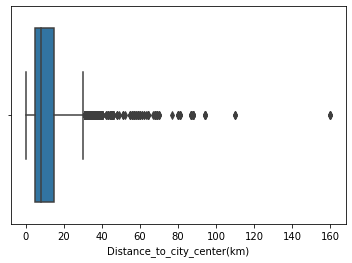

In [307]:
sns.boxplot(dataset_num["Distance_to_city_center(km)"])

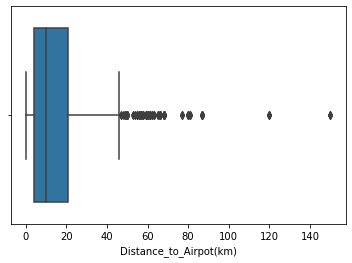

In [308]:
sns.boxplot(dataset_num["Distance_to_Airpot(km)"])

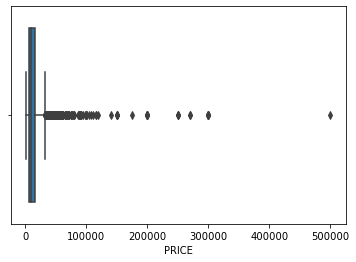

In [309]:
sns.boxplot(dataset_num["PRICE"])

# Handling Outliers

In [310]:
for col in dataset_num.columns:
    q1=dataset_num[col].describe()["25%"]
    q3=dataset_num[col].describe()["75%"]
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    count=dataset_num[(dataset_num[col]<lb)  | (dataset_num[col]>ub)].shape[0]
    p=count/5342*100
if (count>0):
            print("======================"+col+"======================")
            print("count",count)
            print("Percentage",p)

======================PRICE======================
count 381
Percentage 7.1321602396106325


In [311]:
outliers=dataset_num[(dataset_num[col]<lb)  | (dataset_num[col]>ub)]

In [312]:
lb_dict={}.fromkeys(dataset_num[(dataset_num["PRICE"]<lb)]["PRICE"],lb)

In [313]:
ub_dict={}.fromkeys(dataset_num[(dataset_num["PRICE"]>ub)]["PRICE"],ub)

In [314]:
lb_dict.update(ub_dict)

In [315]:
dataset_num["PRICE"]=dataset_num["PRICE"].replace(lb_dict)

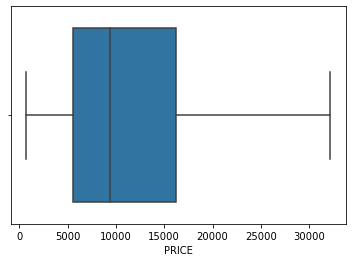

In [316]:
sns.boxplot(dataset_num["PRICE"])

# Encoding the data

In [317]:
name_dict=dataset["name"].value_counts().to_dict()

In [318]:
dataset["name"].unique()

array(['The Park Hyderabad', 'The Westin Hyderabad Mindspace',
       'Courtyard by Marriott Hyderabad', ...,
       'WelcomHeritage Mani Mansion', 'Hotel Cosmopolitan Ahmedabad',
       'Hotel Aagman'], dtype=object)

In [319]:
dataset["name"]=dataset["name"].replace(name_dict)

In [320]:
city_dict=dataset["city"].value_counts().to_dict()

In [321]:
dataset["city"]=dataset["city"].replace(city_dict)

In [322]:
dataset

,name,city,Distance_to_city_center(km),Distance_to_Airpot(km),pool,gym,spa,free_parking,bathtub,restuarant,...,Connecting_rooms_available,Internet_access,Pet_friendly,PRICE,check_in_month,check_in_year,check_in_day,check_out_year,check_out_month,check_out_day
0,3,279,4.0,20.0,yes,yes,yes,yes,no,yes,...,no,no,no,5040,12,2021,2,2021,2,14
1,5,279,9.9,22.0,yes,yes,yes,yes,no,yes,...,no,no,no,7800,12,2021,2,2021,2,14
2,7,279,4.7,21.0,yes,yes,yes,yes,no,yes,...,no,no,no,6700,12,2021,2,2021,2,14
3,7,279,4.7,21.0,yes,yes,yes,yes,no,yes,...,no,no,no,6700,12,2021,2,2021,2,14
4,4,279,4.5,20.0,yes,yes,yes,yes,no,yes,...,no,no,no,6375,12,2021,2,2021,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,2,264,4.9,9.7,no,no,no,yes,yes,no,...,no,no,no,46349,12,2021,2,2021,2,20
5338,2,264,1.6,8.0,no,no,no,no,yes,no,...,no,no,no,8793,12,2021,2,2021,2,20
5339,1,264,77.0,77.0,no,no,no,yes,no,no,...,no,no,no,5396,12,2021,2,2021,2,20
5340,4,264,11.0,16.0,no,no,no,no,yes,no,...,no,no,no,6950,12,2021,2,2021,2,20


In [323]:
city_dict=dataset["city"].value_counts().to_dict()

In [324]:
dataset=pd.get_dummies(dataset, drop_first=True)

In [325]:
dataset=dataset[["name","city","Distance_to_city_center(km)","Distance_to_Airpot(km)","spa_yes","free_parking_yes","bathtub_yes","restuarant_yes","Airport_transfer_yes","Bar_yes","Kitchen_yes","Connecting_rooms_available_yes","Internet_access_yes","Pet_friendly_yes","check_in_month","check_in_year","check_in_day","check_out_year","check_out_month","check_out_day","PRICE"]]


In [326]:
dataset

,name,city,Distance_to_city_center(km),Distance_to_Airpot(km),spa_yes,free_parking_yes,bathtub_yes,restuarant_yes,Airport_transfer_yes,Bar_yes,...,Connecting_rooms_available_yes,Internet_access_yes,Pet_friendly_yes,check_in_month,check_in_year,check_in_day,check_out_year,check_out_month,check_out_day,PRICE
0,3,279,4.0,20.0,1,1,0,1,1,0,...,0,0,0,12,2021,2,2021,2,14,5040
1,5,279,9.9,22.0,1,1,0,1,1,0,...,0,0,0,12,2021,2,2021,2,14,7800
2,7,279,4.7,21.0,1,1,0,1,1,0,...,0,0,0,12,2021,2,2021,2,14,6700
3,7,279,4.7,21.0,1,1,0,1,1,0,...,0,0,0,12,2021,2,2021,2,14,6700
4,4,279,4.5,20.0,1,1,0,1,1,0,...,0,0,0,12,2021,2,2021,2,14,6375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,2,264,4.9,9.7,0,1,1,0,0,0,...,0,0,0,12,2021,2,2021,2,20,46349
5338,2,264,1.6,8.0,0,0,1,0,0,0,...,0,0,0,12,2021,2,2021,2,20,8793
5339,1,264,77.0,77.0,0,1,0,0,0,0,...,0,0,0,12,2021,2,2021,2,20,5396
5340,4,264,11.0,16.0,0,0,1,0,0,0,...,0,0,0,12,2021,2,2021,2,20,6950


# Splitting into train and test data

In [327]:
x=dataset.iloc[:,0:14].values

In [328]:
y=dataset.iloc[:,14]

In [329]:
from sklearn.model_selection import train_test_split

In [330]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Feature Scaling

In [331]:
from sklearn.preprocessing import StandardScaler

In [332]:
sc=StandardScaler()

In [333]:
x_train=sc.fit_transform(x_train)

In [334]:
x_test=sc.transform(x_test)

# Building a model

In [335]:
from sklearn.linear_model import Ridge
ri_model=Ridge(alpha=1)
ri_model.fit(x_train,y_train)
y_predri=ri_model.predict(x_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_predri)
print("Rmse:",np.sqrt(mse))
r2_scoreri=r2_score(y_test,y_predri)
print("r2_score:",r2_scoreri)

Rmse: 0.0
r2_score: 1.0


In [336]:
from sklearn.linear_model import Lasso
la_model=Lasso(alpha=1)
la_model.fit(x_train,y_train)
y_predla=la_model.predict(x_test)

mse=mean_squared_error(y_test,y_predla)
print("Rmse:",np.sqrt(mse))
r2_scorela=r2_score(y_test,y_predla)
print("r2_score",r2_scorela)

Rmse: 0.0
r2_score 1.0


C:\Users\Anjali\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


In [338]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(max_features='auto')
dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)


mse=mean_squared_error(y_test,y_preddt)
print("Rmse:",np.sqrt(mse))
r2_scoredt=r2_score(y_test,y_preddt)
print("r2_score",r2_scoredt)


Rmse: 0.0
r2_score 1.0


In [347]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
adb=AdaBoostRegressor(n_estimators=10)
adb.fit(x_train,y_train)
y_predadb=adb.predict(x_test)



mse=mean_squared_error(y_test,y_predadb)
print("Rmse:",np.sqrt(mse))
r2_scoreadb=r2_score(y_test,y_predadb)
print("r2_score",r2_scoreadb)

Rmse: 0.0
r2_score 1.0


In [340]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

gbm=GradientBoostingRegressor(n_estimators=10)
gbm.fit(x_train,y_train)
y_predgbm=gbm.predict(x_test)


mse=mean_squared_error(y_test,y_predgbm)
print("Rmse:",np.sqrt(mse))
r2_scoregbm=r2_score(y_test,y_predgbm)
print("r2_score",r2_scoregbm)

Rmse: 0.0
r2_score 1.0


In [341]:
from sklearn.svm import SVR
sv=SVR(kernel="linear")
sv.fit(x_train,y_train)
y_predsvr=sv.predict(x_test)

mse=mean_squared_error(y_test,y_predsvr)
print("Rmse:",np.sqrt(mse))
r2_scoresvr=r2_score(y_test,y_predsvr)
print("r2_score",r2_scoresvr)

Rmse: 0.0
r2_score 1.0


In [342]:
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

xgb=XGBRegressor(n_estimators=10)
xgb.fit(x_train,y_train)
y_predxg=xgb.predict(x_test)


mse=mean_squared_error(y_test,y_predxg)
print("Rmse:",np.sqrt(mse))
r2_scorexg=r2_score(y_test,y_predxg)
print("r2_score",r2_scorexg)

Rmse: 0.32517242431640625
r2_score 0.0


In [343]:
from sklearn.naive_bayes import GaussianNB
regressor_nb=GaussianNB()
regressor_nb.fit(x_train,y_train)
y_prednb=regressor_nb.predict(x_test)


mse=mean_squared_error(y_test,y_prednb)
print("Rmse:",np.sqrt(mse))
r2_scorenb=r2_score(y_test,y_prednb)
print("r2_score",r2_scorenb)

Rmse: 0.0
r2_score 1.0


In [344]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_predrf=rf.predict(x_test)

mse=mean_squared_error(y_test,y_predrf)
print("Rmse:",np.sqrt(mse))
r2_scorerf=r2_score(y_test,y_predrf)
print("r2_score",r2_scorerf)

Rmse: 0.0
r2_score 1.0


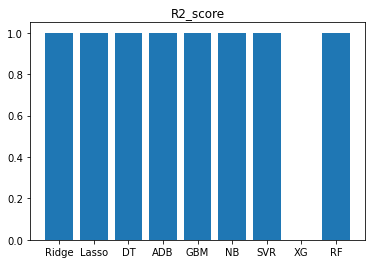

In [348]:
x=["Ridge","Lasso","DT","ADB","GBM","NB","SVR","XG","RF"]
y=[r2_scoreri,r2_scorela,r2_scoredt,r2_scoreadb,r2_scoregbm,r2_scorenb,r2_scoresvr,r2_scorexg,r2_scorerf]
plt.bar(x,y)
plt.title("R2_score")
plt.show()

# Hyperparameter tuning in DT

In [346]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
dt=DecisionTreeRegressor()

In [ ]:
max_depth=np.linspace(3,100,num=2,dtype="int")
max_features=['auto','sqrt','log2']
min_samples_leaf=[1,2,5,10,15]
min_samples_split=[2,5,10,15,30,50]
criterion=['mse']

In [ ]:
param_dict={"max_depth":max_depth,
            "max_features":max_features,
            "min_samples_leaf": min_samples_leaf,
            "min_samples_split":min_samples_split,
            "criterion":criterion
           }

In [ ]:
param_dict

In [ ]:
gsv= GridSearchCV(dt,param_grid=param_dict,scoring="r2", n_jobs=-1,cv=5,verbose=5,return_train_score=True)

In [ ]:
gsv.fit(x_train,y_train)

In [ ]:
y_predgsv=gsv.predict(x_test)

In [ ]:
gsv.best_score_

In [ ]:
gsv.best_estimator_

In [ ]:
gsv.best_params_

# RandomizedSearchCV

In [ ]:
rmsv=RandomizedSearchCV(dt,param_distributions=param_dict,scoring="r2", n_jobs=-1,cv=3,verbose=5,return_train_score=True)

In [ ]:
rmsv.fit(x_train,y_train)

In [ ]:
y_predrmsv=rmsv.predict(x_test)

In [ ]:
rmsv.best_estimator_

In [ ]:
rmsv.best_params_

In [ ]:
rmsv.best_score_

# cat_boost

In [349]:
from catboost import CatBoostRegressor


In [350]:
categorical_features_indices = np.where(dataset.dtypes != np.float)[0]

In [353]:
from catboost import CatBoostRegressor
model=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
model.fit(x_train, y_train,cat_features=categorical_features_indices,eval_set=(x_test, y_test),plot=True)

CatBoostError: 'data' is numpy array of floating point numerical type, it means no categorical features, but 'cat_features' parameter specifies nonzero number of categorical features